In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
df=pd.read_csv("/content/churn.csv")

In [5]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [7]:
df.isnull().sum()

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [10]:
df.drop(["Gender","Age","IsActiveMember","HasCrCard","EstimatedSalary"], axis="columns")

,CreditScore,Geography,Tenure,Balance,NumOfProducts,Exited
0,619,France,2,0.00,1,1
1,608,Spain,1,83807.86,1,0
2,502,France,8,159660.80,3,1
3,699,France,1,0.00,2,0
4,850,Spain,2,125510.82,1,0
...,...,...,...,...,...,...
9995,771,France,5,0.00,2,0
9996,516,France,10,57369.61,1,0
9997,709,France,7,0.00,1,1
9998,772,Germany,3,75075.31,2,1


In [14]:
df['Geography'].unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [16]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df.Geography=le.fit_transform(df.Geography)

In [17]:
x=df[['CreditScore','Geography','Tenure','Balance','NumOfProducts']]
y=df['Exited']

In [18]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test= train_test_split(x,y,train_size=0.7)

In [19]:
print(x_train)
print(x_test)
print(y_train)
print(y_test)

      CreditScore  Geography  Tenure    Balance  NumOfProducts
7821          777          0       2  134571.50              1
4272          640          2       3   77826.80              1
958           531          2       8  132576.25              1
74            519          0       9       0.00              2
8712          469          2       5       0.00              2
...           ...        ...     ...        ...            ...
6352          741          0       9       0.00              2
8050          707          0       2       0.00              2
7577          615          1       3   86920.86              1
2652          601          0       0       0.00              2
6750          618          0       2       0.00              4

[7000 rows x 5 columns]
      CreditScore  Geography  Tenure    Balance  NumOfProducts
7687          754          0       5  146622.35              1
4258          782          1       7   98556.89              2
4182          550          1  

In [42]:
from sklearn.tree import DecisionTreeClassifier

In [43]:
treemodel= DecisionTreeClassifier(max_depth=3)

In [44]:
treemodel.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=3)

In [45]:
from sklearn import tree

[Text(0.5, 0.875, 'X[4] <= 2.5\ngini = 0.323\nsamples = 7000\nvalue = [5581, 1419]'),
 Text(0.25, 0.625, 'X[4] <= 1.5\ngini = 0.296\nsamples = 6778\nvalue = [5553, 1225]'),
 Text(0.125, 0.375, 'X[1] <= 0.5\ngini = 0.4\nsamples = 3545\nvalue = [2566, 979]'),
 Text(0.0625, 0.125, 'gini = 0.349\nsamples = 1763\nvalue = [1366, 397]'),
 Text(0.1875, 0.125, 'gini = 0.44\nsamples = 1782\nvalue = [1200, 582]'),
 Text(0.375, 0.375, 'X[3] <= 1884.345\ngini = 0.141\nsamples = 3233\nvalue = [2987, 246]'),
 Text(0.3125, 0.125, 'gini = 0.064\nsamples = 1831\nvalue = [1770, 61]'),
 Text(0.4375, 0.125, 'gini = 0.229\nsamples = 1402\nvalue = [1217, 185]'),
 Text(0.75, 0.625, 'X[3] <= 50210.0\ngini = 0.22\nsamples = 222\nvalue = [28, 194]'),
 Text(0.625, 0.375, 'X[0] <= 661.5\ngini = 0.43\nsamples = 80\nvalue = [25, 55]'),
 Text(0.5625, 0.125, 'gini = 0.303\nsamples = 43\nvalue = [8, 35]'),
 Text(0.6875, 0.125, 'gini = 0.497\nsamples = 37\nvalue = [17, 20]'),
 Text(0.875, 0.375, 'X[3] <= 140980.32\ngini

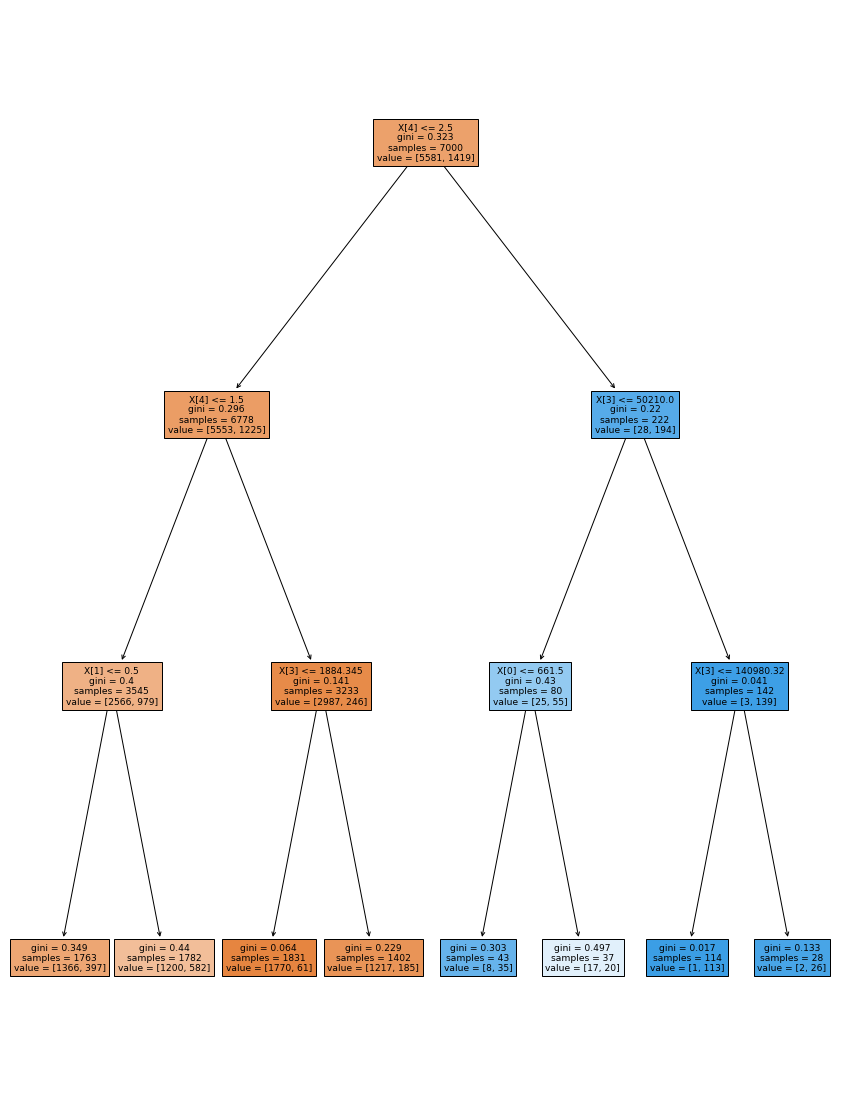

In [48]:
plt.figure(figsize=(15,20))
tree.plot_tree(treemodel, filled=True)

In [49]:
y_pred = treemodel.predict(x_test)

In [51]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, plot_confusion_matrix

In [53]:
ac=accuracy_score(y_pred, y_test)
print(ac)

0.8166666666666667


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


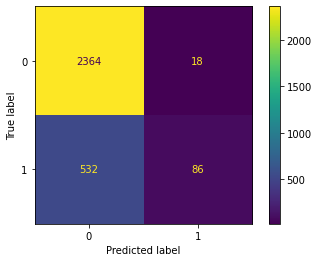

In [55]:
confusion_matrix(y_pred, y_test)
plot_confusion_matrix(treemodel, x_test, y_test)

In [57]:
report=classification_report(y_pred, y_test)
print(report)

              precision    recall  f1-score   support

           0       0.99      0.82      0.90      2896
           1       0.14      0.83      0.24       104

    accuracy                           0.82      3000
   macro avg       0.57      0.82      0.57      3000
weighted avg       0.96      0.82      0.87      3000

